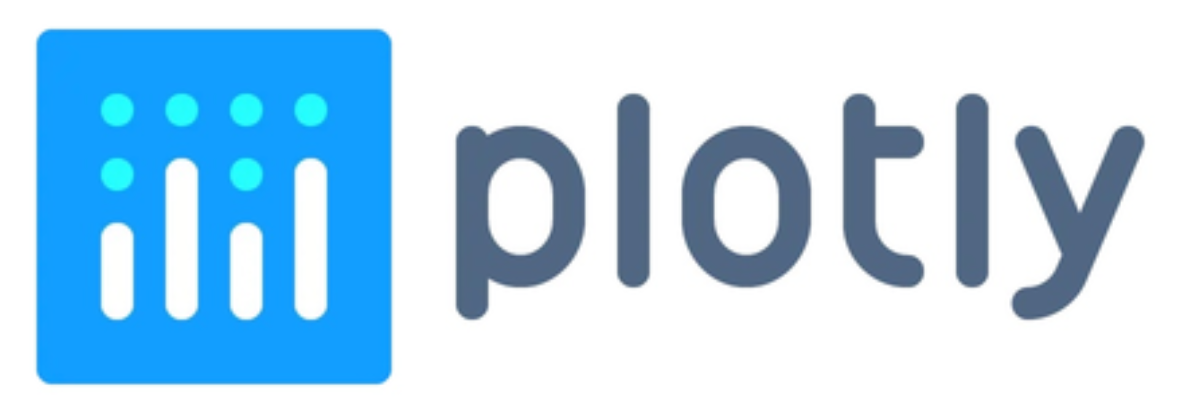

Plotly &mdash; графическая библиотека с открытым исходным кодом, в последние годы набирающая популярность в Data Science среде. Её ключевое преимущество перед `seaborn` и `matplotlib` — удобство построения сложных интерактивных визуализаций — полноценных мини-приложений, которые делают результат работы аналитика более доступным для конечного пользователя. 

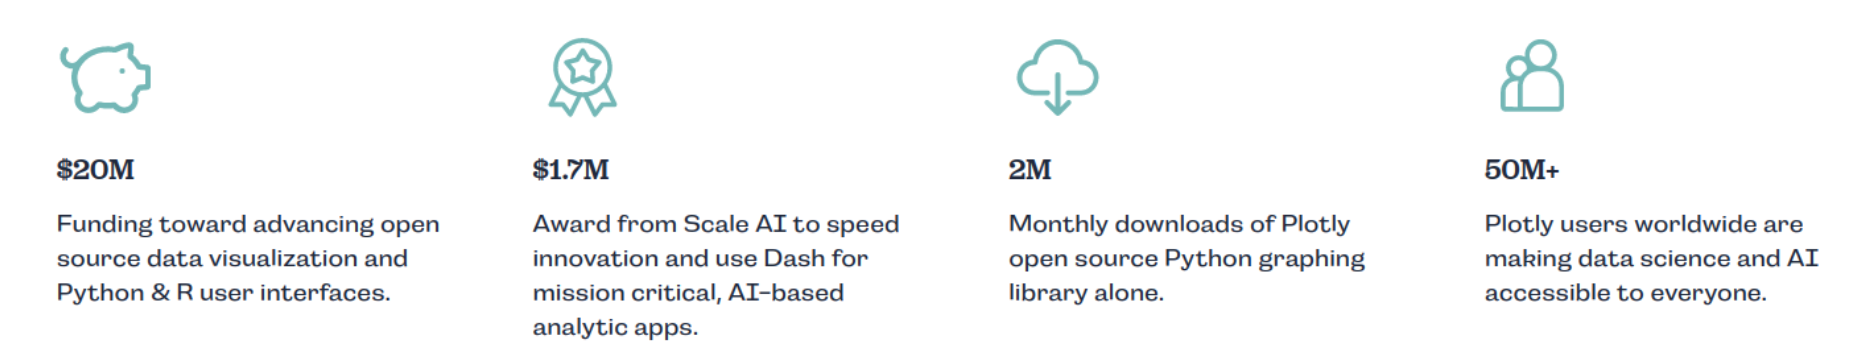

Этот ноутбук призван проиллюстрировать базовый функционал на нескольких понятных примерах.

# 1. Scatter plots: Капитализация Apple

Визуализации ниже показывают, как менялась капитализация компании Apple в зависимости от месяца.

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [ ]:
# Загрузка данных с помощью библиотеки pandas
df = pd.read_csv(
    "https://raw.githubusercontent.com/"\
    "plotly/datasets/master/finance-charts-apple.csv"
)
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


Сначала простой интерактивный `scatter plot`.  
При наведении курсора отображаются координаты: дата и капитализация компании.

In [ ]:
# Создание фигуры точечного графика
fig = go.Figure(data=go.Scatter(
    x=df['Date'], y=df['AAPL.High']
))
# Добавление подписей для графика
fig.update_layout(
    title_text="Финансы компании 'Apple'",
    title_font_size=20,
    xaxis_title="Дата",
    yaxis_title="AAPL High",  
)
# Отображение графика
fig.show()

Для наглядности, к графику можно добавить возможность выделить интересующий диапазон дат.

In [ ]:
# Создание фигуры
fig = go.Figure()
# Добавление к фигуре 1-го точечного графика
fig.add_trace(go.Scatter(x=df.Date, y=df['AAPL.High'], name="AAPL High"))
# Добавление к фигуре 2-го точечного графика
fig.add_trace(go.Scatter(x=df.Date, y=df['AAPL.Low'], name="AAPL Low"))
# Добавление к подписи для графиков и слайдера по оси x
fig.update_layout(
    title_text="Финансы компании 'Apple'",
    title_font_size=20,
    xaxis_rangeslider_visible=True
)
# Отображение графика
fig.show()

# 2. Scatter plots in Plotly Express: Gapminder Foundation

Этот пример иллюстрирует использование Plotly Express — набора шаблонов для быстрой и красивой визуализации (как seaborn для matplotlib).
Для этого используется датасет [Gapminder Foundation](https://en.wikipedia.org/wiki/Gapminder_Foundation) — просветительской Шведской организации, которая анализирует финансовое неравенство в мире. Конкретно здесь рассматриваются данные за 2007 год. По одной оси отложен ВВП, по другой — прогноз средней продолжительности жизни. Размер каждой точки на графике пропорционален размеру государства.

In [ ]:
# Данные из библиотеки plotly
import plotly.express as px

In [ ]:
fig = px.scatter(
    px.data.gapminder().query("year==2007"), 
    x="gdpPercap", 
    y="lifeExp", 
    size="pop", 
    color="continent",
    hover_name="country", 
    log_x=True, 
    size_max=60
)
fig.show()

Более сложный дашборд -- с возможностью фильтрации данных по конкретному континенту -- можно сделать при помощи plotly. Но это существенно сложнее.

In [ ]:
df = px.data.gapminder()
# Выбираем 2007 год
df = df.query("year==2007")
# Задаем размер кругов для графика
df['pop_scaled'] = np.sqrt(df['pop']) / 500
# Собираем информацию о континентах
continents = df['continent'].unique()

In [ ]:
fig = go.Figure()
for cont in continents:
    # Временная таблица для континента
    df_cont = df.query("continent=='{}'".format(cont))
    # Достраиваем графики в цикле
    fig.add_trace(
        go.Scatter(
            mode='markers',
            x=df_cont['gdpPercap'], 
            y=df_cont['lifeExp'], 
            name=cont,
            hovertext=df_cont['country'],
            marker=dict(size=df_cont['pop_scaled']),
        )
    )

    
fig.update_layout(
    # Задаем лог-масштаб по оси x
    xaxis_type="log",
    updatemenus=[
        dict(
            type="buttons",
            direction="down",
            active=0,
            buttons=list(
                [dict(
                    label=cont,
                    method="update",
                    args=[{"visible": continents == cont},
                           {"title, 2007": cont}])
                for cont in continents]
                + [dict(label='All',
                     method="update",
                     args=[{"visible": [True] * len(continents)},
                           {"title, 2007": 'All continents'}])]
                ))]
)
fig.show()

# 4. Гистограммы и KDE: Анализ чаевых

Анализируется датасет из Plotly Express. Кто оставляет больше чаевых, мужчины или женщины?
- `total_bill` — суммарный чек ($)

- `tip` — размер чаевых ($)

- `sex` — пол клинета

In [ ]:
df = px.data.tips()
fig = px.histogram(
    df, x="total_bill", y="tip", color="sex",
    marginal="box", # или violin, rug — тип вспомогательной визуализации
    hover_data=df.columns  # что отображается при наведении
)
fig.show()

# 5. Heatmap: История коммитов

Так с помощью  Plotly можно проанализировать историю коммитов членов команды за два месяца работы. К сожалению, в `plotly.express` не слишком хорошо реализована поддержка тепловых карт, потому придётся использовать обычный `plotly`.

In [ ]:
import datetime

programmers = [
    'Алина', 
    'Вячеслав', 
    'Олег', 
    'Егор',
    'Никита',
    'Лилия',
    'София'
]

base = datetime.datetime.today()
dates = base - np.arange(60) * datetime.timedelta(days=1)
z = np.random.poisson(size=(len(programmers), len(dates)))

fig = go.Figure(
    data=go.Heatmap(
        z=z,  # данные
        x=dates,  # имена столбцов 
        y=programmers,  # имена строк
        colorscale='Viridis'  # цветовая схема
    )
)

fig.update_layout(
    title='Коммиты на GitHub по дням',
    xaxis_nticks=30
)

fig.show()

# Галерея

С более продвинутыми визуализациями можно ознакомиться [в официальной галерее](https://plot.ly/python/).